In [2]:
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt

__Q:__ Call up the documentation for the `norm` function imported above. What is the second listed method?

__A:__ The second listed method is the pdf() function for probability distribution function 

__Q:__ Use the method that generates random variates to draw five samples from the standard normal distribution.

__A:__

In [3]:
seed(47)
# draw five samples here
ex = norm.rvs(size=5)

__Q:__ What is the mean of this sample? Is it exactly equal to the value you expected? Hint: the sample was drawn from the standard normal distribution.

__A:__ The mean should be close, if not exactly 0 since the mean of the normal distribution is zero

In [4]:
# Calculate and print the mean here, hint: use np.mean()
mu = np.mean(ex)
print(mu)

0.19355593334131074


__Q:__ What is the standard deviation of these numbers? Calculate this manually here as $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n}}$. Hint: np.sqrt() and np.sum() will be useful here and remember that numpy supports [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

__A:__

In [5]:
sig = np.sqrt(np.sum((ex - mu)**2)/len(ex))
print(sig)

0.9606195639478641


__Q:__ If all we had to go on was our five samples, what would be our best estimate of the population standard deviation? Use Bessel's correction ($n-1$ in the denominator), thus $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n-1}}$.

__A:__

In [6]:
bessel_c = np.sqrt(np.sum((ex - mu)**2)/(len(ex) - 1))
print(bessel_c)

1.0740053227518152


__Q:__ Now use numpy's std function to calculate the standard deviation of our random samples. Which of the above standard deviations did it return?

__A:__ It returned the standard deviation without Bessel's correction

In [7]:
nump_std = np.std(ex)
print("Numpy std function == standard deviation without correction: {}".format(str(nump_std == sig)))
print("Numpy std function == standard deviation with correction: {}".format(str(nump_std == bessel_c)))

Numpy std function == standard deviation without correction: True
Numpy std function == standard deviation with correction: False


__Q:__ Consult the documentation for np.std() to see how to apply the correction for estimating the population parameter and verify this produces the expected result.

__A:__ To add the bessel correction to the numpy function you must use the parameter ddof=1

In [8]:
nump_std = np.std(ex, ddof=1)
print("Numpy std function without ddof == standard deviation without correction: {}".format(str(nump_std == sig)))
print("Numpy std function with ddof == standard deviation with correction: {}".format(str(nump_std == bessel_c)))

Numpy std function without ddof == standard deviation without correction: False
Numpy std function with ddof == standard deviation with correction: True


__Q:__ Simulate performing this random trial every day for a year, calculating the mean of each daily sample of 10, and plot the resultant sampling distribution of the mean.

__A:__

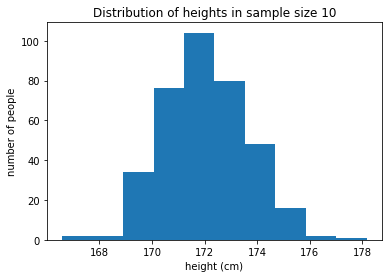

In [9]:
seed(47)

pop_heights = norm.rvs(172, 5, size=50000)

def townsfolk_sampler(n):
    return np.random.choice(pop_heights, n)

# take your samples here
means = [np.mean(townsfolk_sampler(10)) for i in range(365)]
_ = plt.hist(means, bins=10)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in sample size 10')

__Q:__ Verify the above results from the CLT.

__A:__ 

In [10]:
mean = np.mean(pop_heights)
sig = np.std(pop_heights)

sample_mean = np.mean(means)
sample_sig = np.std(means)
clt = sig / np.sqrt(10)

print("The population mean: {}\nThe sample mean: {}".format(mean, sample_mean))
print()
print("CLT proposed standard deviation: {}\nThe sample standard deviation: {}".format(clt, sample_sig))

The population mean: 172.0192602425845
The sample mean: 172.0474957369702

CLT proposed standard deviation: 1.5782419116544761
The sample standard deviation: 1.590245247149885


__Q:__ Repeat the above year's worth of samples but for a sample size of 50 (perhaps you had a bigger budget for conducting surveys that year!) Would you expect your distribution of sample means to be wider (more variable) or narrower (more consistent)? Compare your resultant summary statistics to those predicted by the CLT.

__A:__

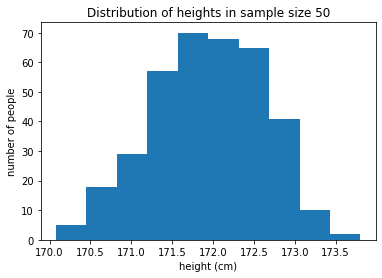

In [11]:
seed(47)
# calculate daily means from the larger sample size here
bigger_means = [np.mean(townsfolk_sampler(50)) for i in range(365)]
_ = plt.hist(bigger_means, bins=10)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in sample size 50')

In [12]:
print(np.mean(bigger_means))
print(np.std(bigger_means))

171.94366080916114
0.6736107539771146


__Q:__ Using this fact, calculate the probability of observing the value 1 or less in a single observation from the standard normal distribution. Hint: you may find it helpful to sketch the standard normal distribution (the familiar bell shape) and mark the number of standard deviations from the mean on the x-axis and shade the regions of the curve that contain certain percentages of the population.

__A:__

In [13]:
import scipy.integrate as integrate

coef = 1 / (norm.std() * np.sqrt(2 * np.pi)) 
f = lambda x: np.exp((-1/2) * ((x - norm.mean())/norm.std())**2)
result = coef * integrate.quad(f, -np.inf, 1)[0]
print(result)

0.8413447460685435


__Q:__ Use the cdf() function to answer the question above again and verify you get the same answer.

__A:__

In [15]:
print(norm.cdf(1))

0.8413447460685429


__Q:__ Using our knowledge of the population parameters for our townsfolk's heights, what is the probability of selecting one person at random and their height being 177 cm or less? Calculate this using both of the approaches given above.

__A:__

In [16]:
coef = 1 / (pop_heights.std() * np.sqrt(2 * np.pi)) 
f = lambda x: np.exp((-1/2) * ((x - pop_heights.mean())/pop_heights.std())**2)
result = coef * integrate.quad(f, -np.inf, 177)[0]
print(result)

0.8408546025640756


In [17]:
print(norm.cdf(177, loc=pop_heights.mean(), scale=pop_heights.std()))

0.8408546025640735


__Q:__ Turning this question around. Let's say we randomly pick one person and measure their height and find they are 2.00 m tall? How surprised should we be at this result, given what we know about the population distribution? In other words, how likely would it be to obtain a value at least as extreme as this? Express this as a probability.

__A:__

In [21]:
p = norm.cdf(200, loc=pop_heights.mean(), scale=pop_heights.std())
print(str(1-p) + "%")

1.0327726340797483e-08%


__Q:__ Let's now start from the position of knowing nothing about the heights of people in our town.
* Use our favorite random seed of 47, to randomly sample the heights of 50 townsfolk
* Estimate the population mean using np.mean
* Estimate the population standard deviation using np.std (remember which denominator to use!)
* Calculate the (95%) [margin of error](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/hypothesis-testing/margin-of-error/#WhatMofE) (use the exact critial z value to 2 decimal places - [look this up](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/find-critical-values/) or use norm.ppf())
* Calculate the 95% Confidence Interval of the mean
* Does this interval include the true population mean?

__A:__

In [23]:
seed(47)
# take your sample now
sample1 = townsfolk_sampler(50)

In [24]:
mu = sample1.mean()
print(mu)

172.7815108576788


In [25]:
sig = sample1.std()
print(sig)

4.153258225264712


In [26]:
alpha = 1 - (95/100)
p = 1 - (alpha/2)
me = norm.ppf(p) * (sig/np.sqrt(50))
print(me)

1.151203291581224


In [36]:
upper = mu + me
lower = mu - me
print("Range of interval: {:.2f} - {:.2f}".format(lower, upper))

Range of interval: 171.63 - 173.93


__Q:__ Above we calculated the confidence interval using the critical z value. What is the problem with this? What requirement, or requirements, are we (strictly) failing?

__A:__ This interval is not corrected for sampling bias and doesn't represent the population as accurately

__Q:__ Calculate the 95% confidence interval for the mean using the _t_ distribution. Is this wider or narrower than that based on the normal distribution above? If you're unsure, you may find this [resource](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/confidence-interval/) useful. For calculating the critical value, remember how you could calculate this for the normal distribution using norm.ppf().

__A:__

In [38]:
n = len(sample1) - 1
alpha = (1 - .95)/2
me = norm.ppf(alpha) * (sig/np.sqrt(n))

upper = mu + me
lower = mu - me
print("Range of interval: {:.2f} - {:.2f}".format(upper, lower))

Range of interval: 171.62 - 173.94
